take height weight, check if nominally distributed by log sqr root and reciprocal 

3 mian techniques of transformation of graphs, goal is to make look like normal distribution, like bell curve, requirement for regression algorithm 
1. log
2. sqr root
3. reciprocal is new value




STEPS:
convert data to numbers that are usable
encode scale
distribute shape/transform
final output is something that can be fed to an algorithm 

In [15]:
import pandas as pd
df = pd.read_csv('weight-height.csv')
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [16]:
gender_dummies=pd.get_dummies(df['Gender'])
gender_dummies
df_new=pd.merge(gender_dummies, df, right_index=True, left_index=True)
df_new.drop('Gender', axis=1, inplace=True)
df_new


,Female,Male,Height,Weight
0,0,1,73.847017,241.893563
1,0,1,68.781904,162.310473
2,0,1,74.110105,212.740856
3,0,1,71.730978,220.042470
4,0,1,69.881796,206.349801
5,0,1,67.253016,152.212156
6,0,1,68.785081,183.927889
7,0,1,68.348516,167.971110
8,0,1,67.018950,175.929440
9,0,1,63.456494,156.399676


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1176882d0>]],
      dtype=object)

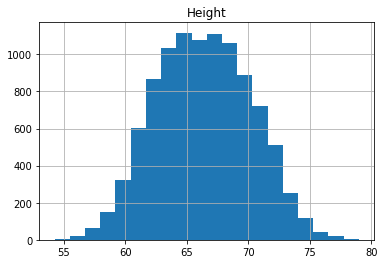

In [32]:
df_new.hist(column='Height', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1172aab90>]],
      dtype=object)

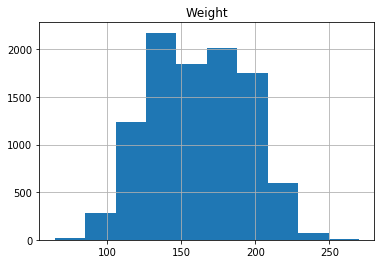

In [20]:
df_new.hist(column='Weight')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117af2810>]],
      dtype=object)

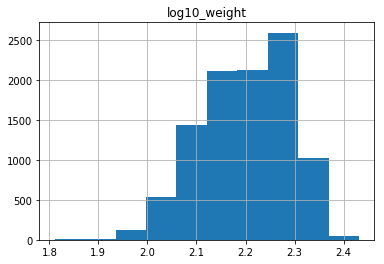

In [45]:
import numpy as np
df_new['log10_weight']= np.log10(df_new['Weight'])
df_new.hist(column='log10_weight')

In [46]:
df_new

,Female,Male,Height,Weight,log_weight,sqrt_weight,rec_weight,log10_weight,exp_weight
0,0,1,73.847017,241.893563,5.488498,15.552928,0.004134,2.383624,241.893563
1,0,1,68.781904,162.310473,5.089511,12.740113,0.006161,2.210347,162.310473
2,0,1,74.110105,212.740856,5.360075,14.585639,0.004701,2.327851,212.740856
3,0,1,71.730978,220.042470,5.393821,14.833829,0.004545,2.342507,220.042470
4,0,1,69.881796,206.349801,5.329573,14.364881,0.004846,2.314604,206.349801
5,0,1,67.253016,152.212156,5.025275,12.337429,0.006570,2.182449,152.212156
6,0,1,68.785081,183.927889,5.214544,13.562002,0.005437,2.264648,183.927889
7,0,1,68.348516,167.971110,5.123792,12.960367,0.005953,2.225235,167.971110
8,0,1,67.018950,175.929440,5.170083,13.263840,0.005684,2.245339,175.929440
9,0,1,63.456494,156.399676,5.052415,12.505986,0.006394,2.194236,156.399676


In [47]:
df_new.Weight.skew()

0.03295450444592437

df_new.log_weight.skew()

In [50]:
df_new.sqrt_weight.skew()

-0.15513022819733105

In [51]:
df_new.rec_weight.skew()

0.8323247922105395

In [52]:
df_new.log10_weight.skew()

-0.3566671553345008

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117a726d0>]],
      dtype=object)

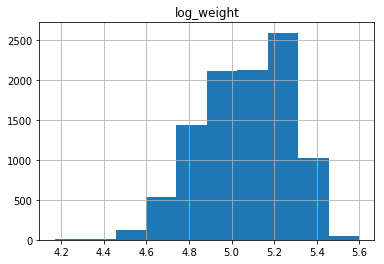

In [43]:
df_new['log_weight']= np.log(df_new['Weight'])
df_new.hist(column='log_weight')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1179f6210>]],
      dtype=object)

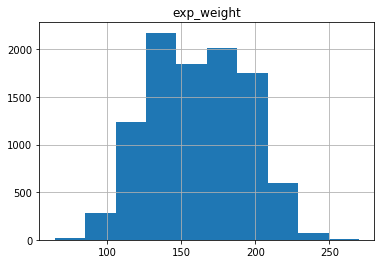

In [41]:
df_new['exp_weight']= np.exp(df_new['log_weight'])
df_new.hist(column='exp_weight')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117727690>]],
      dtype=object)

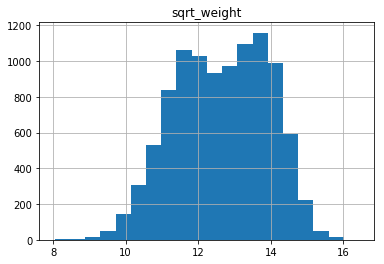

In [34]:
df_new['sqrt_weight']= np.sqrt(df_new['Weight'])
df_new.hist(column='sqrt_weight', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117602dd0>]],
      dtype=object)

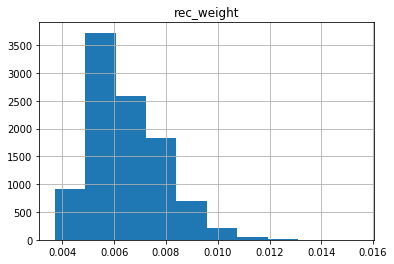

In [31]:
df_new['rec_weight']= np.reciprocal(df_new['Weight'])
df_new.hist(column='rec_weight')

In [4]:
import matplotlib.pyplot as plt



In [6]:
!pip install seaborn

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/System/Library/Frameworks/Python.framework/Versions/2.7/Resources/Python.app/Contents/MacOS/Python -m pip install --upgrade pip' command.


In [9]:
!pip install seaborn

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/System/Library/Frameworks/Python.framework/Versions/2.7/Resources/Python.app/Contents/MacOS/Python -m pip install --upgrade pip' command.


In [13]:
df_new.hist()

NameError: name 'df_new' is not defined

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit_transform(df[['Height']])

df['fit_transform_height'] = scaler.fit_transform(df[['Height']])

scaler = MinMaxScaler()
scaler.fit_transform(df[['Weight']])

df['fit_transform_weight'] = scaler.fit_transform(df[['Weight']])
df

In [20]:
from sklearn.preprocessing import Normalizer 

In [ ]:
nor = Normalizer(norm='l1')

In [61]:
from scipy.stats import boxcox



In [64]:
df_new['boxcox_weight']=boxcox(df_new.Weight)[0]

In [67]:
df_new.boxcox_weight.skew()

-0.042797899967383084

In [58]:
df_new.Weight.skew()

0.03295450444592437